# Singular Value Decomposition

In [45]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [46]:
df = pd.read_excel('DSAICourseInterestRelevanceSurvey.xlsx')
df

,Unnamed: 0,MAL100,MAL101,MAL403,EEL101,ECL101,BML101,CSL100,CSL201,CSL202,DSL201,Unnamed: 11,Unnamed: 12,"Please fill values {1,2,3,4,5}",Unnamed: 14
0,Student 1,4.000,3.000000,4.000,1.000,1.00,1.000000,4.000000,5.000000,5.00,5.000000,3.300000,NaN,Legend,NaN
1,Student 2,3.000,3.000000,3.000,1.000,1.00,1.000000,4.000000,5.000000,5.00,5.000000,3.100000,NaN,1,Neither interesting nor relevant
2,Student 3,4.000,4.000000,3.000,3.000,4.00,2.000000,4.000000,5.000000,4.00,NaN,3.666667,NaN,2,"Little interesting, but relevance not clear. O..."
3,Student 4,3.000,4.000000,4.000,1.000,1.00,1.000000,5.000000,5.000000,5.00,2.000000,3.100000,NaN,3,Somewhat interesting and somewhat relevant
4,Student 5,3.000,3.000000,4.000,3.000,3.00,2.000000,4.000000,5.000000,5.00,4.000000,3.600000,NaN,4,Interesting and Relevant
5,Student 6,3.000,3.000000,5.000,1.000,1.00,1.000000,4.000000,5.000000,5.00,5.000000,3.300000,NaN,5,Very Interesting and Very Relevant to DSAI
6,Student 7,3.000,4.000000,4.000,1.000,1.00,1.000000,4.000000,4.000000,4.00,5.000000,3.100000,NaN,NaN,NaN
7,Student 8,3.000,4.000000,2.000,2.000,3.00,2.000000,4.000000,4.000000,4.00,5.000000,3.300000,NaN,NaN,NaN
8,Student 9,3.000,4.000000,4.000,2.000,3.00,1.000000,4.000000,4.000000,4.00,4.000000,3.300000,NaN,NaN,NaN
9,Student 10,4.000,4.000000,3.000,3.000,2.00,2.000000,4.000000,4.000000,5.00,4.000000,3.500000,NaN,NaN,NaN


## Some Preprocssing

Removing legends placed in the google sheets & the row & column averages.

In [47]:
df.drop(df.columns[[0,-1,-2,-3,-4]], axis=1, inplace=True)
df.drop(df.index[[-1]], axis=0, inplace=True)
df

,MAL100,MAL101,MAL403,EEL101,ECL101,BML101,CSL100,CSL201,CSL202,DSL201
0,4.0,3.0,4.0,1.0,1.0,1.0,4.0,5.0,5.0,5.0
1,3.0,3.0,3.0,1.0,1.0,1.0,4.0,5.0,5.0,5.0
2,4.0,4.0,3.0,3.0,4.0,2.0,4.0,5.0,4.0,NaN
3,3.0,4.0,4.0,1.0,1.0,1.0,5.0,5.0,5.0,2.0
4,3.0,3.0,4.0,3.0,3.0,2.0,4.0,5.0,5.0,4.0
5,3.0,3.0,5.0,1.0,1.0,1.0,4.0,5.0,5.0,5.0
6,3.0,4.0,4.0,1.0,1.0,1.0,4.0,4.0,4.0,5.0
7,3.0,4.0,2.0,2.0,3.0,2.0,4.0,4.0,4.0,5.0
8,3.0,4.0,4.0,2.0,3.0,1.0,4.0,4.0,4.0,4.0
9,4.0,4.0,3.0,3.0,2.0,2.0,4.0,4.0,5.0,4.0


In [48]:
df['DSL201'].fillna(df['DSL201'].median(), inplace=True)
df

<ipython-input-48-8f684a589e11>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DSL201'].fillna(df['DSL201'].median(), inplace=True)


,MAL100,MAL101,MAL403,EEL101,ECL101,BML101,CSL100,CSL201,CSL202,DSL201
0,4.0,3.0,4.0,1.0,1.0,1.0,4.0,5.0,5.0,5.0
1,3.0,3.0,3.0,1.0,1.0,1.0,4.0,5.0,5.0,5.0
2,4.0,4.0,3.0,3.0,4.0,2.0,4.0,5.0,4.0,5.0
3,3.0,4.0,4.0,1.0,1.0,1.0,5.0,5.0,5.0,2.0
4,3.0,3.0,4.0,3.0,3.0,2.0,4.0,5.0,5.0,4.0
5,3.0,3.0,5.0,1.0,1.0,1.0,4.0,5.0,5.0,5.0
6,3.0,4.0,4.0,1.0,1.0,1.0,4.0,4.0,4.0,5.0
7,3.0,4.0,2.0,2.0,3.0,2.0,4.0,4.0,4.0,5.0
8,3.0,4.0,4.0,2.0,3.0,1.0,4.0,4.0,4.0,4.0
9,4.0,4.0,3.0,3.0,2.0,2.0,4.0,4.0,5.0,4.0


## Applying SVD

In [49]:
df.mean(axis=0)

,0
MAL100,3.125000
MAL101,3.708333
MAL403,3.625000
EEL101,1.625000
ECL101,1.750000
BML101,1.666667
CSL100,4.041667
CSL201,4.208333
CSL202,4.250000
DSL201,4.333333


In [50]:
U, S, Vt = np.linalg.svd(df)

In [51]:
print(U.shape)
print(S.shape)
print(Vt.shape)

(24, 24)
(10,)
(10, 10)


Below are the obtained singular values

In [52]:
print(S)

[53.07393546  5.75017452  5.01959197  4.81153898  4.27686151  3.56875698
  2.97318535  2.47832767  1.9929876   1.32821205]


In [53]:
for row in U:
    print("\t ".join([f"{value:.2f}" for value in row]))


-0.22	 0.20	 0.05	 -0.25	 -0.11	 -0.02	 -0.08	 -0.23	 -0.18	 0.44	 -0.10	 0.04	 0.15	 -0.11	 -0.31	 -0.22	 -0.26	 0.01	 -0.20	 -0.25	 -0.02	 -0.32	 0.27	 -0.11
-0.20	 0.12	 0.06	 -0.33	 0.02	 0.01	 -0.25	 -0.19	 0.03	 -0.11	 0.22	 -0.09	 0.16	 0.04	 0.08	 -0.07	 -0.25	 0.14	 -0.12	 0.59	 0.06	 0.27	 0.10	 0.30
-0.23	 -0.45	 0.13	 0.04	 -0.13	 0.00	 -0.07	 0.06	 -0.06	 0.33	 -0.36	 -0.09	 0.02	 -0.03	 0.02	 0.12	 -0.21	 -0.01	 0.20	 -0.18	 -0.13	 0.33	 -0.12	 0.43
-0.20	 0.30	 0.16	 0.10	 0.15	 -0.59	 -0.08	 0.26	 0.08	 -0.20	 -0.24	 -0.06	 -0.25	 0.03	 0.27	 -0.07	 -0.29	 0.08	 0.04	 -0.10	 -0.00	 -0.14	 0.12	 0.06
-0.22	 -0.21	 0.20	 0.04	 -0.06	 -0.24	 0.23	 -0.39	 0.04	 -0.36	 0.06	 0.24	 -0.03	 -0.17	 -0.06	 -0.00	 0.19	 0.03	 -0.39	 -0.21	 -0.25	 0.26	 0.15	 0.00
-0.22	 0.27	 0.10	 -0.22	 -0.07	 0.06	 0.25	 -0.24	 0.12	 0.04	 -0.13	 -0.18	 -0.21	 -0.22	 0.10	 -0.10	 0.17	 -0.17	 -0.07	 -0.02	 0.24	 -0.09	 -0.61	 0.14
-0.20	 0.18	 -0.05	 -0.09	 -0.03	 0.24	 0.00	 0.18	 0.01	 0.01	 

In [54]:
for row in Vt:
    print("\t ".join([f"{value:.2f}" for value in row]))

-0.29	 -0.34	 -0.34	 -0.15	 -0.17	 -0.15	 -0.37	 -0.39	 -0.40	 -0.40
0.00	 0.08	 0.43	 -0.44	 -0.63	 -0.32	 0.05	 -0.07	 0.28	 -0.14
-0.16	 0.08	 0.09	 0.17	 0.24	 -0.51	 -0.46	 0.56	 0.16	 -0.27
0.10	 0.52	 0.28	 0.21	 0.24	 0.16	 -0.15	 -0.50	 0.12	 -0.48
-0.36	 0.37	 -0.19	 -0.14	 -0.32	 0.60	 -0.14	 0.40	 -0.01	 -0.18
-0.19	 0.36	 0.09	 -0.02	 -0.07	 -0.10	 -0.51	 -0.23	 -0.16	 0.69
-0.25	 -0.31	 0.74	 0.20	 0.00	 0.23	 0.00	 0.12	 -0.43	 -0.02
-0.02	 0.48	 -0.06	 -0.10	 0.03	 -0.36	 0.44	 0.13	 -0.64	 -0.09
-0.50	 -0.03	 0.09	 -0.59	 0.56	 0.02	 0.17	 -0.09	 0.19	 0.04
0.63	 -0.02	 0.10	 -0.54	 0.20	 0.19	 -0.36	 0.18	 -0.27	 -0.05


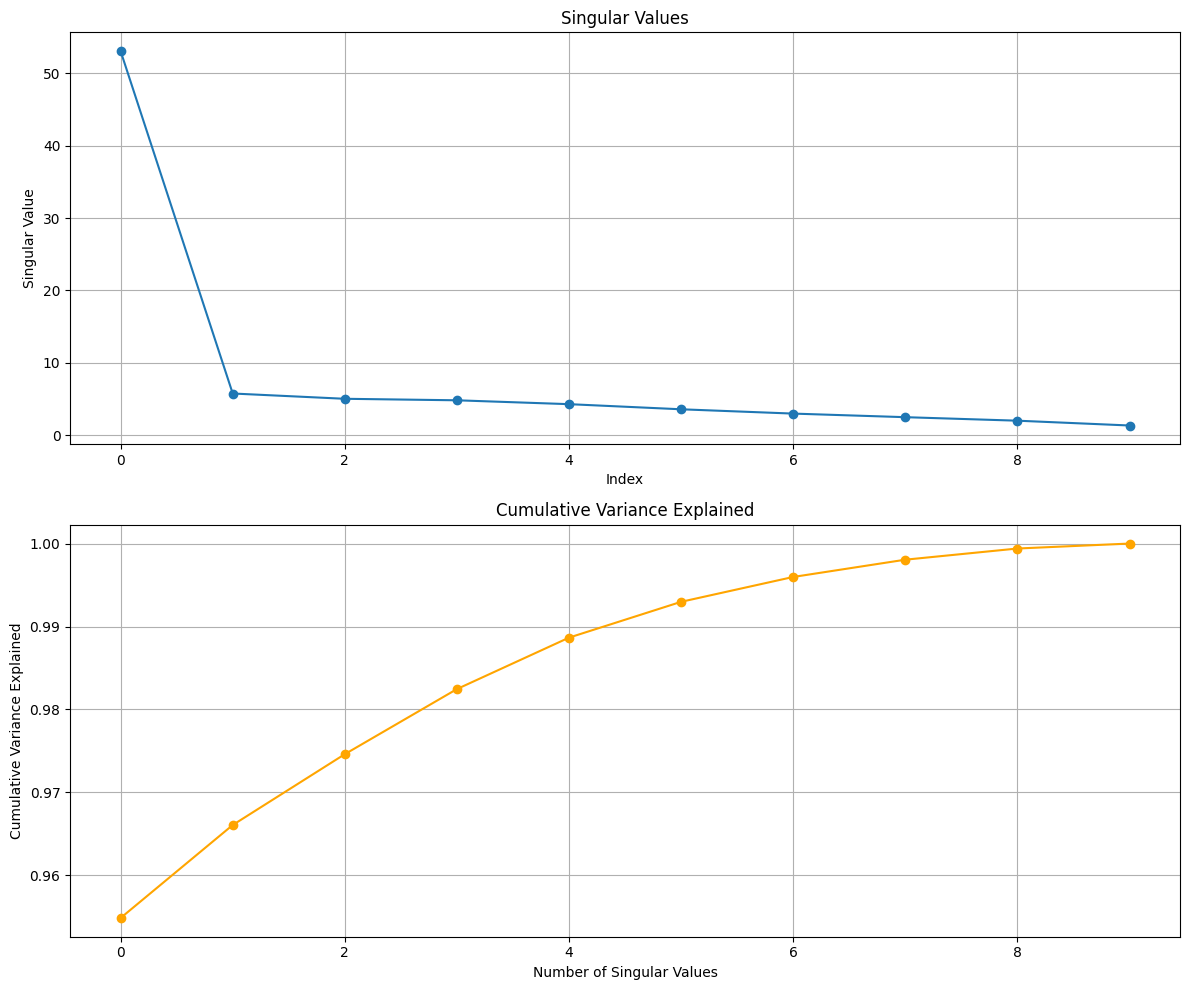

In [55]:
plt.figure(figsize=(12, 10))

# Plot singular values
plt.subplot(2, 1, 1)
plt.plot(S[:], marker='o')
plt.title('Singular Values')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.grid()

# Calculate explained variance for each singular value
explained_variance = (S**2) / np.sum(S**2)
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative variance explained
plt.subplot(2, 1, 2)
plt.plot(cumulative_variance[:], marker='o', color='orange')
plt.title('Cumulative Variance Explained')
plt.xlabel('Number of Singular Values')
plt.ylabel('Cumulative Variance Explained')
plt.grid()

plt.tight_layout()
plt.show()

---

# Principal Component Analysis

In [56]:
pca = PCA(n_components=min(df.shape))
pca_model = pca.fit_transform(df)

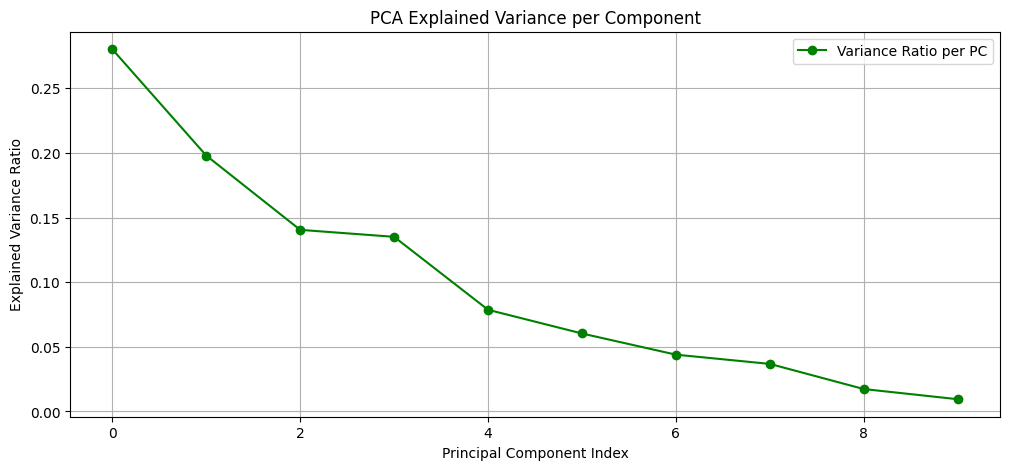

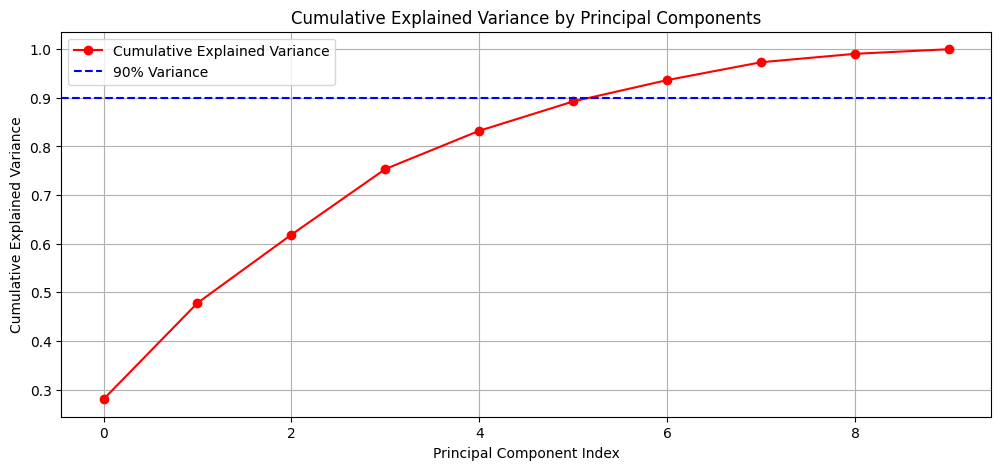

In [57]:
plt.figure(figsize=(12, 5))
plt.plot(pca.explained_variance_ratio_[:50], 'o-', color='green', label='Variance Ratio per PC')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance per Component')
plt.grid(True)
plt.legend()
plt.show()

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(12, 5))
plt.plot(cumulative_variance[:50], 'o-', color='red', label='Cumulative Explained Variance')
plt.xlabel('Principal Component Index')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.axhline(y=0.9, color='blue', linestyle='--', label='90% Variance')
plt.grid(True)
plt.legend()
plt.show()

In [58]:
print(pca.explained_variance_ratio_)

[0.2802018  0.19794571 0.14046332 0.13507476 0.0786211  0.06028836
 0.04390818 0.03675641 0.01730147 0.00943889]
